**In this file we take out the attributes that travelers are considering while selecting a hotel**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Libraries for Text data
import spacy
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Read the dataset
data = pd.read_csv('hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## Attributes based on Reviews (**Cleaned Data**)

**Removing Stop Words, numbers and puntuation marks**

In [37]:
# Copy the Data
data1 = data.copy()
data1.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [32]:
from gensim.parsing.preprocessing import remove_stopwords
from pattern.en import lemma

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [33]:
def lemmatiz(text):
    review = " ".join([lemma(wd) for wd in text.split()])
    return review

In [25]:
def lemmatized(text):
    wordnet=WordNetLemmatizer()
    for i in range(len(text)):
        review = word_tokenize(text)
        review = [lemma(word) for word in review]
        review = ' '.join(review)
        return review

In [26]:
x = 'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night'
print(lemmatiz(x))
print('\n')
print(lemmatized(x))

nice hotel expensive park get good deal stay hotel anniversary, arrive late even take advice previou review do valet parking, check quick easy, little disappoint non-existent view room room clean nice size, bed comfortable wake stiff neck high pillows, not soundproof like hear music room night morn loud bang door open close hear people talk hallway, maybe just noisy neighbors, aveda bath product nice, do not goldfish stay nice touch take advantage stay longer, location great walk distance shopping, overall nice experience have pay 40 park night


nice hotel expensive park get good deal stay hotel anniversary , arrive late even take advice previou review do valet park , check quick easy , little disappoint non-existent view room room clean nice size , bed comfortable wake stiff neck high pillow , not soundproof like hear music room night morn loud bang door open close hear people talk hallway , maybe just noisy neighbor , aveda bath product nice , do not goldfish stay nice touch take ad

In [39]:
# Lowercase the reviews
data1['cleaned']=data1['Review'].apply(lambda x: x.lower())

# Remove digits and punctuation marks
data1['cleaned']=data1['cleaned'].apply(lambda x: re.sub('[^a-z]',' ', x))

# Removing extra spaces if present
data1['cleaned']=data1['cleaned'].apply(lambda x: re.sub(' +',' ',x))

data1['cleaned']=data1['cleaned'].apply(lambda x: remove_stopwords(x))
data1['lemmatized']=data1['cleaned'].apply(lambda x: lemmatiz(x))
data1.head()

,Review,Rating,cleaned,lemmatized
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive park get good deal stay h...
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,ok special charge diamond member hilton decide...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...


In [107]:
from sklearn.feature_extraction.text import CountVectorizer

# Converet Text into Bi-grams Vectors
vectorizer = CountVectorizer(ngram_range=(2,2), max_features=10000)
X = vectorizer.fit_transform(data1.cleaned)

In [108]:
# Convert X into DataFrame
count_vect_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
count_vect_df

,aaa rate,abc store,able book,able check,able eat,able enjoy,able leave,able room,able sit,able sleep,...,york times,young children,young kids,young lady,young man,young people,young woman,yr old,zona rosa,zoo station
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# Vocabulary with index of Features
vocab = vectorizer.vocabulary_
vocab

{'nice hotel': 5604,
 'hotel expensive': 4001,
 'got good': 3385,
 'good deal': 3241,
 'stay hotel': 8509,
 'arrived late': 248,
 'late evening': 4679,
 'took advice': 9127,
 'previous reviews': 6513,
 'valet parking': 9400,
 'check quick': 1415,
 'quick easy': 6650,
 'little disappointed': 4820,
 'non existent': 5835,
 'view room': 9443,
 'room room': 7438,
 'room clean': 7227,
 'clean nice': 1555,
 'nice size': 5643,
 'size bed': 8003,
 'bed comfortable': 716,
 'room night': 7379,
 'night morning': 5731,
 'hear people': 3686,
 'people talking': 6150,
 'bath products': 495,
 'stay nice': 8532,
 'nice touch': 5656,
 'location great': 4960,
 'great walking': 3569,
 'walking distance': 9581,
 'distance shopping': 2179,
 'overall nice': 5983,
 'nice experience': 5589,
 'having pay': 3674,
 'parking night': 6060,
 'ok special': 5899,
 'th anniversary': 8894,
 'booked suite': 998,
 'paid extra': 6013,
 'bedroom bathroom': 751,
 'standard hotel': 8400,
 'hotel room': 4224,
 'room took': 7494

In [110]:
# Stored the Keys of the Vocabulary into another variable
word_list = vocab.keys()
len(word_list)

10000

In [111]:
# Open the positive and negative words
with open("positive-words.txt","r") as pos:
    pos_word = pos.read().split("\n")
    
with open("negative-words.txt","r") as pos:
    neg_word = pos.read().split("\n")

In [112]:
# Store positive comment in a list

pos_comment = []
for word in word_list:
    if word.split()[0] in pos_word:
        pos_comment.append(word)
    elif word.split()[-1] in pos_word:
        pos_comment.append(word)
pos_comment

['nice hotel',
 'got good',
 'good deal',
 'quick easy',
 'room clean',
 'clean nice',
 'nice size',
 'bed comfortable',
 'stay nice',
 'nice touch',
 'location great',
 'great walking',
 'overall nice',
 'nice experience',
 'things like',
 'free breakfast',
 'helpful asked',
 'desk good',
 'good breakfast',
 'best breakfast',
 'convenient hotel',
 'sure good',
 'good got',
 'got nice',
 'great room',
 'good better',
 'beds comfortable',
 'comfortable good',
 'hotel clean',
 'hotel super',
 'nice rooms',
 'good hotel',
 'comfortable bed',
 'room great',
 'nice shower',
 'nice gesture',
 'facilities great',
 'amenities great',
 'great stay',
 'stay wonderful',
 'wonderful time',
 'location excellent',
 'friendly room',
 'free wine',
 'thought great',
 'great staff',
 'staff friendly',
 'free wireless',
 'feel like',
 'look like',
 'excellent stay',
 'stay great',
 'staff helpful',
 'helpful booked',
 'great walk',
 'great coffee',
 'place recommend',
 'service best',
 'best friend',
 'r

In [113]:
# Store negative comment in a list

neg_comment = []
for word in word_list:
    if word.split()[0] in neg_word:
        neg_comment.append(word)
    elif word.split()[-1] in neg_word:
        neg_comment.append(word)
neg_comment

['hotel expensive',
 'little disappointed',
 'downside room',
 'street noise',
 'noise problem',
 'problem hotel',
 'little noisy',
 'staff rude',
 'room unfortunately',
 'worst experience',
 'ca wrong',
 'rock hard',
 'room noise',
 'slight problem',
 'noise hotel',
 'complaints hotel',
 'noise rooms',
 'hotel pricey',
 'bit dark',
 'desk rude',
 'staff unfriendly',
 'bad good',
 'old dirty',
 'bad location',
 'problem noise',
 'ca fault',
 'bit hard',
 'bit noise',
 'noise street',
 'bathroom sink',
 'traffic noise',
 'complaint hotel',
 'service horrible',
 'loud music',
 'noise coming',
 'hard beat',
 'little noise',
 'said problem',
 'beds hard',
 'spring break',
 'bit slow',
 'room broken',
 'parking expensive',
 'little expensive',
 'little pricey',
 'worst hotel',
 'room smell',
 'cigarette smoke',
 'hear noise',
 'outside noise',
 'service expensive',
 'place bad',
 'bad place',
 'terrible hotel',
 'hotel problem',
 'big problem',
 'negative reviews',
 'room noisy',
 'noisy ho

In [114]:
# Load the spacy module
nlp = spacy.load('en_core_web_sm')

In [115]:
# finding the pattern
for text in pos_comment[0:100]:
    doc = nlp(text)
    for token in doc:
        print(token.text, token.pos_, token.dep_)
    print('\n')

nice ADJ amod
hotel NOUN ROOT


got VERB ROOT
good ADJ acomp


good ADJ amod
deal NOUN ROOT


quick PROPN ROOT
easy ADV advmod


room NOUN ROOT
clean ADJ amod


clean VERB ROOT
nice ADJ advmod


nice ADJ amod
size NOUN ROOT


bed NOUN npadvmod
comfortable ADJ ROOT


stay VERB ROOT
nice ADJ acomp


nice ADJ amod
touch NOUN ROOT


location NOUN ROOT
great ADJ amod


great ADJ amod
walking NOUN ROOT


overall ADV advmod
nice ADJ ROOT


nice ADJ amod
experience NOUN ROOT


things NOUN ROOT
like ADP prep


free ADJ amod
breakfast NOUN ROOT


helpful ADJ nsubj
asked VERB ROOT


desk VERB ROOT
good NOUN dobj


good ADJ amod
breakfast NOUN ROOT


best ADJ amod
breakfast NOUN ROOT


convenient ADJ amod
hotel NOUN ROOT


sure INTJ ROOT
good ADJ intj


good ADJ nsubj
got VERB ROOT


got VERB ROOT
nice ADJ acomp


great ADJ amod
room NOUN ROOT


good ADV ROOT
better ADV advmod


beds VERB ROOT
comfortable ADJ acomp


comfortable ADJ amod
good NOUN ROOT


hotel NOUN ROOT
clean ADJ amod


hotel NOUN

In [116]:
# Function for Lemmatization
def lemma(word):
    wordnet=WordNetLemmatizer()
    return wordnet.lemmatize(word)

In [117]:
# store positive attributes and the corresponding noun in List

pos_attributes = []
pos_attributes_noun = []

for text in pos_comment:
    doc = nlp(text)
    if (doc[0].pos_=='ADJ' and doc[1].pos_=='NOUN') or (doc[0].pos_=='NOUN' and doc[1].pos_=='ADJ'):
        pos_attributes.append(doc)
        if doc[1].pos_=='NOUN':
            pos_attributes_noun.append(lemma(str(doc[1])))
        else:
            pos_attributes_noun.append(lemma(str(doc[0])))
        
print(pos_attributes)

[nice hotel, good deal, room clean, nice size, bed comfortable, nice touch, location great, great walking, nice experience, free breakfast, good breakfast, best breakfast, convenient hotel, great room, comfortable good, hotel clean, nice rooms, good hotel, comfortable bed, room great, nice shower, nice gesture, facilities great, amenities great, great stay, wonderful time, location excellent, friendly room, free wine, great staff, staff friendly, free wireless, excellent stay, staff helpful, great walk, great coffee, best friend, room quiet, food good, good drinks, good lighting, staff great, great job, location good, easy walk, positive experience, excellent staff, exceptional service, happy hour, great location, good food, location fabulous, great food, great experience, best advice, nice room, positive things, hotel good, good location, rooms decent, decent size, nice bathrooms, bathrooms clean, location convenient, hotel nice, nice staff, hotel lovely, lovely staff, complimentary i

In [118]:
pos_attributes_noun

['hotel',
 'deal',
 'room',
 'size',
 'bed',
 'touch',
 'location',
 'walking',
 'experience',
 'breakfast',
 'breakfast',
 'breakfast',
 'hotel',
 'room',
 'good',
 'hotel',
 'room',
 'hotel',
 'bed',
 'room',
 'shower',
 'gesture',
 'facility',
 'amenity',
 'stay',
 'time',
 'location',
 'room',
 'wine',
 'staff',
 'staff',
 'wireless',
 'stay',
 'staff',
 'walk',
 'coffee',
 'friend',
 'room',
 'food',
 'drink',
 'lighting',
 'staff',
 'job',
 'location',
 'walk',
 'experience',
 'staff',
 'service',
 'hour',
 'location',
 'food',
 'location',
 'food',
 'experience',
 'advice',
 'room',
 'thing',
 'hotel',
 'location',
 'room',
 'size',
 'bathroom',
 'bathroom',
 'location',
 'hotel',
 'staff',
 'hotel',
 'staff',
 'internet',
 'desk',
 'luck',
 'stay',
 'view',
 'room',
 'choice',
 'choice',
 'staff',
 'time',
 'staff',
 'neighborhood',
 'room',
 'room',
 'staff',
 'value',
 'option',
 'bathroom',
 'service',
 'restaurant',
 'price',
 'floor',
 'room',
 'staff',
 'service',
 'hotel

In [119]:
# store negative attributes and the corresponding noun in List

neg_attributes = []
neg_attributes_noun = []

for text in neg_comment:
    doc = nlp(text)
    if (doc[0].pos_=='ADJ' and doc[1].pos_=='NOUN') or (doc[0].pos_=='NOUN' and doc[1].pos_=='ADJ'):
        neg_attributes.append(doc)
        if doc[1].pos_=='NOUN':
            neg_attributes_noun.append(lemma(str(doc[1])))
        else:
            neg_attributes_noun.append(lemma(str(doc[0])))
            
print(neg_attributes)

[hotel expensive, downside room, little noisy, worst experience, slight problem, bit dark, staff unfriendly, bad good, old dirty, bad location, service horrible, loud music, little noise, bit slow, worst hotel, outside noise, bad place, terrible hotel, big problem, negative reviews, noisy hotel, slow service, bit pricey, bit annoying, bad price, noise bad, bad hotel, terrible experience, terrible service, hotel bad, dirty rooms, horrible experience, poor service, big issue, cheap hotel, location bad, limited english, expensive room, expensive hotel, expensive rooms, service slow, difficult time, bad reviews, hard beds, negative point, bad review, noisy room, service poor, poor food, bad experience, dark wood, bad service, big mistake, food bad, smoke free, rooms dark, bit expensive, room cold, bit disappointed, dirty room, scrambled eggs, noisy night, great problem, disappointed hotel, wrong room, rooms dirty, negative hotel, service bad, bad day, bit tired, bit steep, worst thing, exp

In [120]:
neg_attributes_noun

['hotel',
 'room',
 'noisy',
 'experience',
 'problem',
 'bit',
 'staff',
 'good',
 'dirty',
 'location',
 'service',
 'music',
 'noise',
 'bit',
 'hotel',
 'noise',
 'place',
 'hotel',
 'problem',
 'review',
 'hotel',
 'service',
 'bit',
 'bit',
 'price',
 'noise',
 'hotel',
 'experience',
 'service',
 'hotel',
 'room',
 'experience',
 'service',
 'issue',
 'hotel',
 'location',
 'english',
 'room',
 'hotel',
 'room',
 'service',
 'time',
 'review',
 'bed',
 'point',
 'review',
 'room',
 'service',
 'food',
 'experience',
 'wood',
 'service',
 'mistake',
 'food',
 'smoke',
 'room',
 'bit',
 'room',
 'bit',
 'room',
 'egg',
 'night',
 'problem',
 'hotel',
 'room',
 'room',
 'hotel',
 'service',
 'day',
 'bit',
 'bit',
 'thing',
 'hotel',
 'disappointment',
 'food',
 'food',
 'hotel',
 'room',
 'time',
 'thing',
 'bit',
 'cold',
 'food',
 'staff',
 'people',
 'problem',
 'smell',
 'room',
 'problem',
 'meat',
 'location',
 'problem',
 'room',
 'problem',
 'rock',
 'service',
 'comment',

In [121]:
pos_attributes[:5]

[nice hotel, good deal, room clean, nice size, bed comfortable]

In [122]:
for word in pos_attributes[:2]:
    unique = count_vect_df[count_vect_df[str(word)]>0].shape

In [123]:
df[0]

231

In [124]:
# store positive attributes and the corresponding noun into DataFrame and also add the count of that word

pos_dt = {}
no_of_review = []
for word in pos_attributes:
    pos_dt[str(word)]=count_vect_df[str(word)].sum()
    unique = count_vect_df[count_vect_df[str(word)]>0].shape
    no_of_review.append(unique[0])
    
pos_s = pd.Series(pos_dt)

pos_df = pd.DataFrame(pos_s, columns=['counts_pos'])
pos_df['pos_no_of_review'] = no_of_review
pos_df['noun'] = pos_attributes_noun

pos_df

,counts_pos,pos_no_of_review,noun
nice hotel,723,661,hotel
good deal,239,231,deal
room clean,1067,1061,room
nice size,104,101,size
bed comfortable,401,399,bed
...,...,...,...
helpful recommend,24,24,recommend
hotel stylish,18,18,hotel
hot buffet,24,23,buffet
grand oasis,20,13,oasis


In [126]:
# Sort the dataframe into Descending Order
pos_df = pos_df.sort_values('counts_pos', ascending=False)
pos_df.head(20)

,counts_pos,pos_no_of_review,noun
staff friendly,2239,2212,staff
great location,2211,2022,location
hotel great,1499,1402,hotel
staff helpful,1146,1131,staff
room clean,1067,1061,room
great time,864,724,time
location great,825,811,location
great place,823,770,place
good value,796,720,value
food good,791,749,food


In [128]:
# group by based on 'noun' and add counts
pos_attributes_noun = pos_df.groupby('noun', as_index=False).sum().sort_values('counts_pos', ascending=False)
pos_attributes_noun

,noun,counts_pos,pos_no_of_review
117,hotel,12119,11644
187,room,11884,11651
208,staff,8946,8843
134,location,7888,7547
96,food,3216,3117
...,...,...,...
94,florence,18,17
227,travel,18,18
86,excellent,18,14
178,rating,17,16


In [129]:
# store negative attributes and the corresponding noun into DataFrame and also add the count of that word

neg_dt = {}
no_of_review = []
for word in neg_attributes:
    neg_dt[str(word)]=count_vect_df[str(word)].sum()
    unique = count_vect_df[count_vect_df[str(word)]>0].shape
    no_of_review.append(unique[0])
    
    
neg_s = pd.Series(neg_dt)

neg_df = pd.DataFrame(neg_s, columns=['counts_neg'])
neg_df['neg_no_of_review'] = no_of_review
neg_df['noun'] = neg_attributes_noun

neg_df

,counts_neg,neg_no_of_review,noun
hotel expensive,105,103,hotel
downside room,26,26,room
little noisy,47,47,noisy
worst experience,33,30,experience
slight problem,19,19,problem
...,...,...,...
stairs steep,22,22,stair
loud night,20,20,night
disturbed noise,17,17,noise
cold towels,24,23,towel


In [130]:
# Sort the dataframe into Descending Order
neg_df = neg_df.sort_values('counts_neg', ascending=False)
neg_df

,counts_neg,neg_no_of_review,noun
negative reviews,205,187,review
bad reviews,176,164,review
hot cold,125,119,cold
hotel expensive,105,103,hotel
worst hotel,101,97,hotel
...,...,...,...
picky eaters,18,18,eater
disappointed food,17,17,food
bad experiences,17,16,experience
disturbed noise,17,17,noise


In [131]:
# group by based on 'noun' and add counts
neg_attributes_noun = neg_df.groupby('noun',as_index=False).sum().sort_values('counts_neg', ascending=False)
neg_attributes_noun

,noun,counts_neg,neg_no_of_review
26,hotel,863,845
2,bit,523,519
47,room,517,511
24,food,505,490
48,service,480,466
...,...,...,...
6,choice,18,18
21,english,18,18
61,way,18,18
62,weather,18,16


In [207]:
# Merge 'pos_attributes_noun' & 'neg_attributes_noun' dataframe on 'noun' column.
pos_neg_compare = pd.merge(pos_attributes_noun, neg_attributes_noun, how='inner', on='noun')
pos_neg_compare

# we can see the common noun present in both + and - attributes

,noun,counts_pos,pos_no_of_review,counts_neg,neg_no_of_review
0,hotel,12119,11644,863,845
1,room,11884,11651,517,511
2,staff,8946,8843,85,84
3,location,7888,7547,78,77
4,food,3216,3117,505,490
5,place,2596,2505,59,58
6,service,2523,2454,480,466
7,time,2219,2017,115,112
8,breakfast,1889,1876,27,27
9,bed,1616,1603,26,25


In [208]:
# Find the % for a noun, i.e. how much % that attribute is used with + sentiment and with - sentiment
pos_neg_compare['pos_percent'] = round(pos_neg_compare['pos_no_of_review']/(pos_neg_compare['pos_no_of_review']+
                                          pos_neg_compare['neg_no_of_review']), 3)

pos_neg_compare['neg_percent'] = round(pos_neg_compare['neg_no_of_review']/(pos_neg_compare['pos_no_of_review']+
                                          pos_neg_compare['neg_no_of_review']), 3)

pos_neg_compare

,noun,counts_pos,pos_no_of_review,counts_neg,neg_no_of_review,pos_percent,neg_percent
0,hotel,12119,11644,863,845,0.932,0.068
1,room,11884,11651,517,511,0.958,0.042
2,staff,8946,8843,85,84,0.991,0.009
3,location,7888,7547,78,77,0.990,0.010
4,food,3216,3117,505,490,0.864,0.136
5,place,2596,2505,59,58,0.977,0.023
6,service,2523,2454,480,466,0.840,0.160
7,time,2219,2017,115,112,0.947,0.053
8,breakfast,1889,1876,27,27,0.986,0.014
9,bed,1616,1603,26,25,0.985,0.015


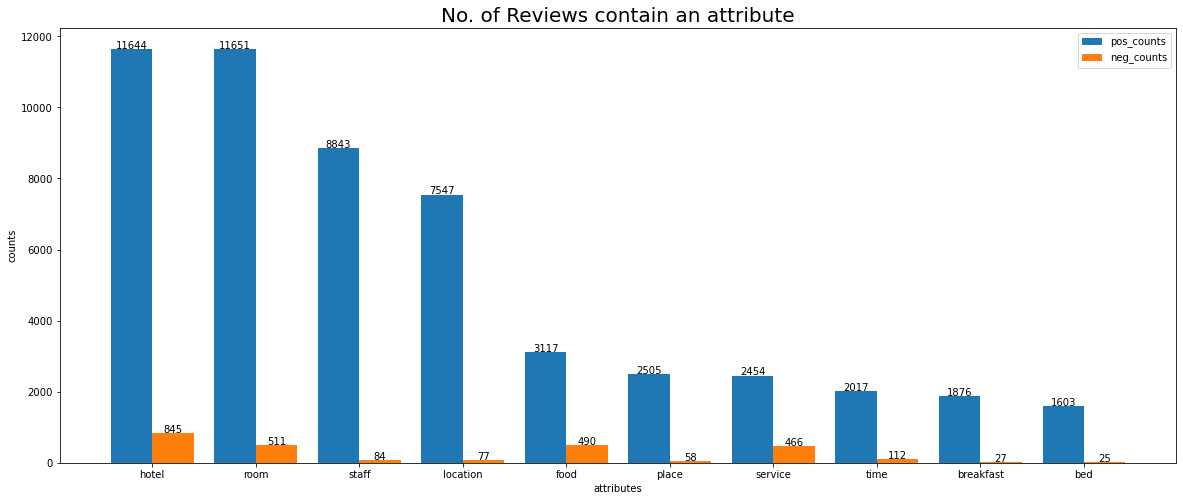

In [209]:
fig, axes = plt.subplots(1, 1 ,figsize= (20,8))
ax1 = axes

ind = np.array(range(len(pos_neg_compare[:10])))

ax1.bar(x=ind-0.2, width=0.4, height='pos_no_of_review', data=pos_neg_compare[:10], label = 'pos_counts')
ax1.bar(x=ind+0.2, width=0.4, height='neg_no_of_review', data=pos_neg_compare[:10], label = 'neg_counts')

for rect in ax1.patches:
    height = rect.get_height()
    if np.isnan(height):
        height = 0
    width = rect.get_width()
    if np.isnan(width):
        width = 0
    x = rect.get_x()
    y = rect.get_y()
    label_x = x + width / 2
    label_y = y + height + 10
    ax1.text(label_x, label_y, round(height), ha='center' ,fontsize= 10)
    
X = np.array(pos_neg_compare[:10].noun)
plt.xticks(ind, X, fontsize=10)
plt.xlabel('attributes',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.title('No. of Reviews contain an attribute', fontsize=20)
plt.legend()
plt.show()

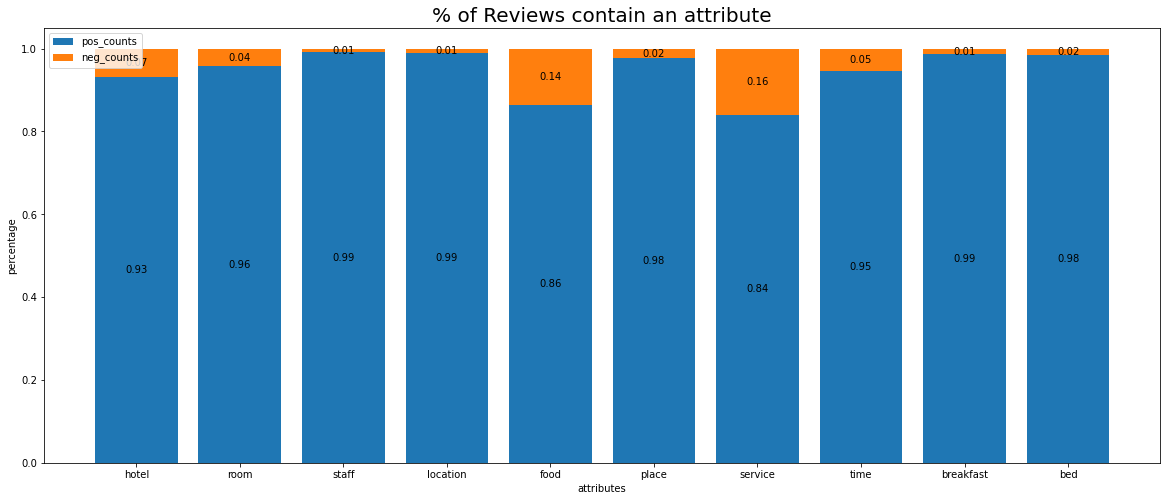

In [210]:
fig, axes = plt.subplots(1, 1 ,figsize= (20,8))
ax2 = axes

ax2.bar(x='noun', height='pos_percent', data=pos_neg_compare[:10], label = 'pos_counts')
ax2.bar(x='noun', height='neg_percent', data=pos_neg_compare[:10], bottom='pos_percent', label = 'neg_counts')

for rect in ax2.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
        
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is also not pixels, it's the
    label_text = '{:.2f}'.format(height)

    label_x = x + width / 2
    label_y = y + height / 2
    ax2.text(label_x, label_y, label_text, ha='center', va='center', fontsize= 10)

plt.xlabel('attributes',fontsize=10)
plt.ylabel('percentage',fontsize=10)
plt.title('% of Reviews contain an attribute', fontsize=20)
plt.legend()
plt.show()

## WordCloud

In [28]:
from wordcloud import WordCloud
from PIL import Image

image = np.array(Image.open("download.png"))

wc = WordCloud(width = 3000, height = 2000, background_color='black', random_state=1, max_words=100, mask=image)

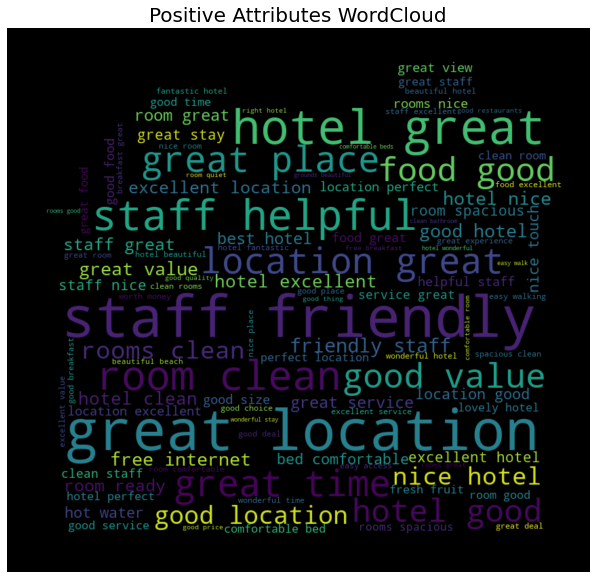

In [29]:
# generate positive attributes word cloud
wc.generate_from_frequencies(pos_dt)

# show
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Positive Attributes WordCloud', fontsize=20)
plt.show()

+ In this wordcloud we can see the positive attributes, the are:
    + staff friendly, location great, room clean, food good, good size, bed comfortable, good service....etc.

In [30]:
# converting 'pos_attributes_noun' dataframe into dictionary
pos_attributes_noun = pos_attributes_noun.to_dict()['counts']
pos_attributes_noun

{'room': 11564,
 'staff': 8838,
 'location': 7807,
 'food': 3184,
 'place': 2554,
 'service': 2526,
 'time': 2168,
 'value': 1864,
 'breakfast': 1849,
 'bathroom': 1714,
 'view': 1628,
 'bed': 1576,
 'stay': 1551,
 'pool': 1231,
 'restaurant': 1144,
 'price': 1120,
 'water': 1077,
 'experience': 911,
 'beach': 892,
 'area': 813,
 'size': 779,
 'people': 767,
 'thing': 732,
 'choice': 676,
 'internet': 653,
 'resort': 652,
 'night': 639,
 'deal': 624,
 'day': 544,
 'vacation': 523,
 'touch': 509,
 'ground': 443,
 'lot': 436,
 'review': 418,
 'good': 404,
 'walking': 396,
 'way': 391,
 'city': 381,
 'walk': 374,
 'drink': 362,
 'access': 361,
 'trip': 359,
 'rate': 357,
 'money': 346,
 'fruit': 343,
 'clean': 327,
 'quality': 295,
 'weather': 290,
 'job': 279,
 'towel': 277,
 'shower': 273,
 'help': 256,
 'coffee': 246,
 'lobby': 245,
 'parking': 238,
 'selection': 234,
 'english': 233,
 'desk': 225,
 'air': 224,
 'buffet': 215,
 'tub': 201,
 'nice': 199,
 'variety': 197,
 'bar': 197,
 '

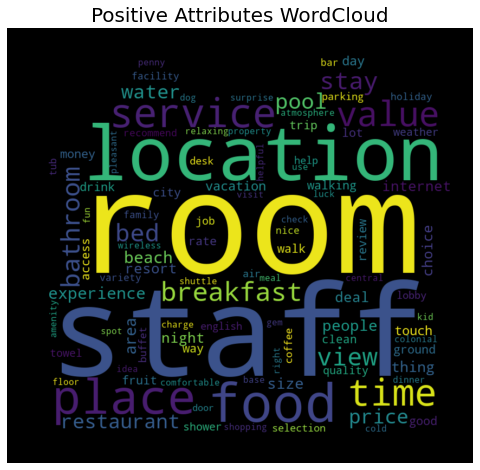

In [31]:
# generate positive-noun attributes word cloud
wc.generate_from_frequencies(pos_attributes_noun)

# show
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Positive Attributes WordCloud', fontsize=20)
plt.show()

+ In this wordcloud we can see the positive attributes of Hotel from Reviews are:
    + Room, Location, Staff, Service, Food, Place, Bathroom, Bed, Water, Breakfast, Price, View.....etc

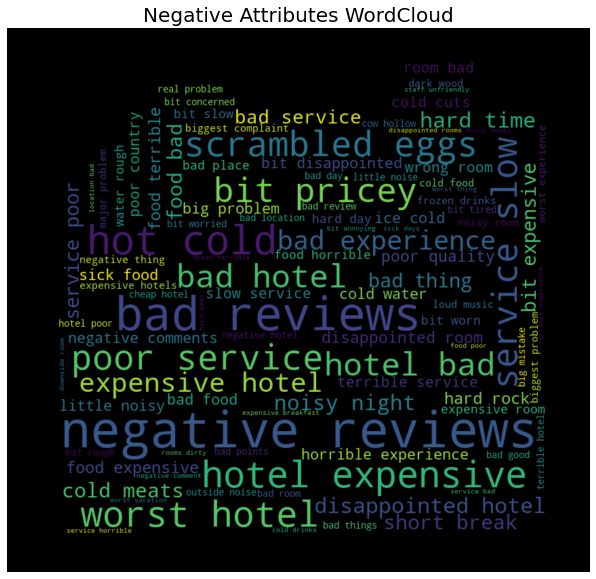

In [32]:
# generate negative attributes word cloud
wc.generate_from_frequencies(neg_dt)

# show
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Negative Attributes WordCloud', fontsize=20)
plt.show()

+ In this wordcloud we can see the negative attributes, they are:
    + negative reviews, hotel expensive, noisy night, food bad, poor service, bit expensive....etc.

In [33]:
# converting 'neg_attributes_noun' dataframe into dictionary
neg_attributes_noun = neg_attributes_noun.to_dict()['counts']
neg_attributes_noun

{'food': 480,
 'service': 459,
 'room': 449,
 'review': 433,
 'problem': 319,
 'experience': 182,
 'thing': 170,
 'cold': 125,
 'time': 115,
 'day': 114,
 'night': 110,
 'egg': 94,
 'water': 81,
 'noise': 80,
 'comment': 77,
 'complaint': 74,
 'location': 73,
 'staff': 67,
 'break': 67,
 'meat': 66,
 'disappointment': 65,
 'drink': 60,
 'place': 59,
 'rock': 55,
 'quality': 53,
 'good': 51,
 'ice': 49,
 'point': 49,
 'noisy': 47,
 'people': 43,
 'stair': 42,
 'towel': 42,
 'country': 41,
 'cut': 39,
 'stay': 38,
 'music': 32,
 'wood': 31,
 'cow': 28,
 'breakfast': 27,
 'vacation': 27,
 'mistake': 27,
 'bed': 26,
 'smoke': 23,
 'issue': 23,
 'buffet': 20,
 'stress': 20,
 'stomach': 20,
 'need': 20,
 'restaurant': 19,
 'beer': 19,
 'musty': 19,
 'drag': 18,
 'price': 18,
 'smell': 18,
 'eater': 18,
 'english': 18,
 'city': 18,
 'choice': 18,
 'way': 18,
 'weather': 18,
 'dirty': 18}

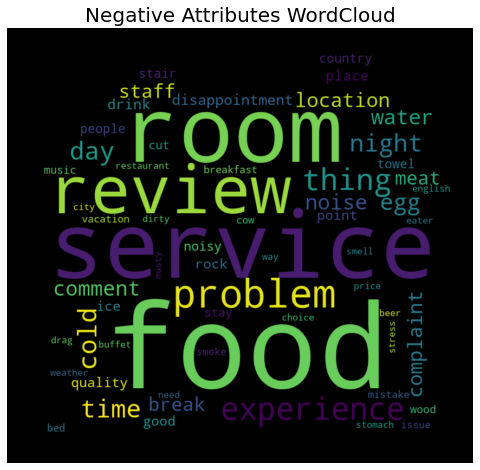

In [34]:
# generate negative-noun attributes word cloud
wc.generate_from_frequencies(neg_attributes_noun)

# show
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Negative Attributes WordCloud', fontsize=20)
plt.show()

+ In this wordcloud we can see the negative attributes of Hotel from Reviews are:
    + Review, Room, Food, Service, staff, location, noise.....etc.